# ML basic end to end project -> detect the folwer based on its feature
**Life cycle of ML project**

* Understand the problem statement
* Data collection
* Exploratory data analysis
* Data cleaning
* Data pre-processing
* Model Training
* Choose the best model


### About
Flower detection is very difficult task for some one who is not from batanical background.so in this project this work is done by a machine. 

## 1) Problem statement :
* Detect the type of flower by passing the sepal length,sepal width,petal length,petal width.

**This project use a classification model to solve this problem :**
* This project gives the name of flower based on its input features.


## 2) Data collection :
*
*
https://www.kaggle.com/datasets/arshid/iris-flower-dataset

### 2.1) Import Data and required packages
**Importing pandas,numpy,matplotlib,seaborn and warning libraries.** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the csv file as pandas dataframe**

In [2]:
df = pd.read_csv(r"IRIS.csv")

**Show top 5 row**

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Show the shape**

In [4]:
df.shape

(150, 5)

**Summary of data**

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Check the datatype**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3) EXPLORING DATA

In [7]:
# define the numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#print the columns
print('we have {} numeriacl feature :{}'.format(len(numerical_features),numerical_features))
print('we have {} categorical feature : {}'.format(len(categorical_features),categorical_features))

we have 4 numeriacl feature :['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
we have 1 categorical feature : ['species']


In [8]:
# proportion of count data on categorical columns
for col in categorical_features :
    print('-------------------------------------')
    print(df[col].value_counts(normalize =True)*100)
    print('-------------------------------------')

-------------------------------------
species
Iris-setosa        33.333333
Iris-versicolor    33.333333
Iris-virginica     33.333333
Name: proportion, dtype: float64
-------------------------------------


**Insight**
- only one categorical value i.e. `species`
- `species` = three categorical value
- `Iris-setosa` =33.33 %
- `Iris-versicolor` =33.33 %
- `Iris-virginica` =33.33%
- All classes are equilly distributed so no biasing found

##Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

Other Type of Analysis are
* **Bivariate Analysis:** The analysis of two variables.
* **Multivariate Analysis:** The analysis of two or more variables.

### Numerical Value

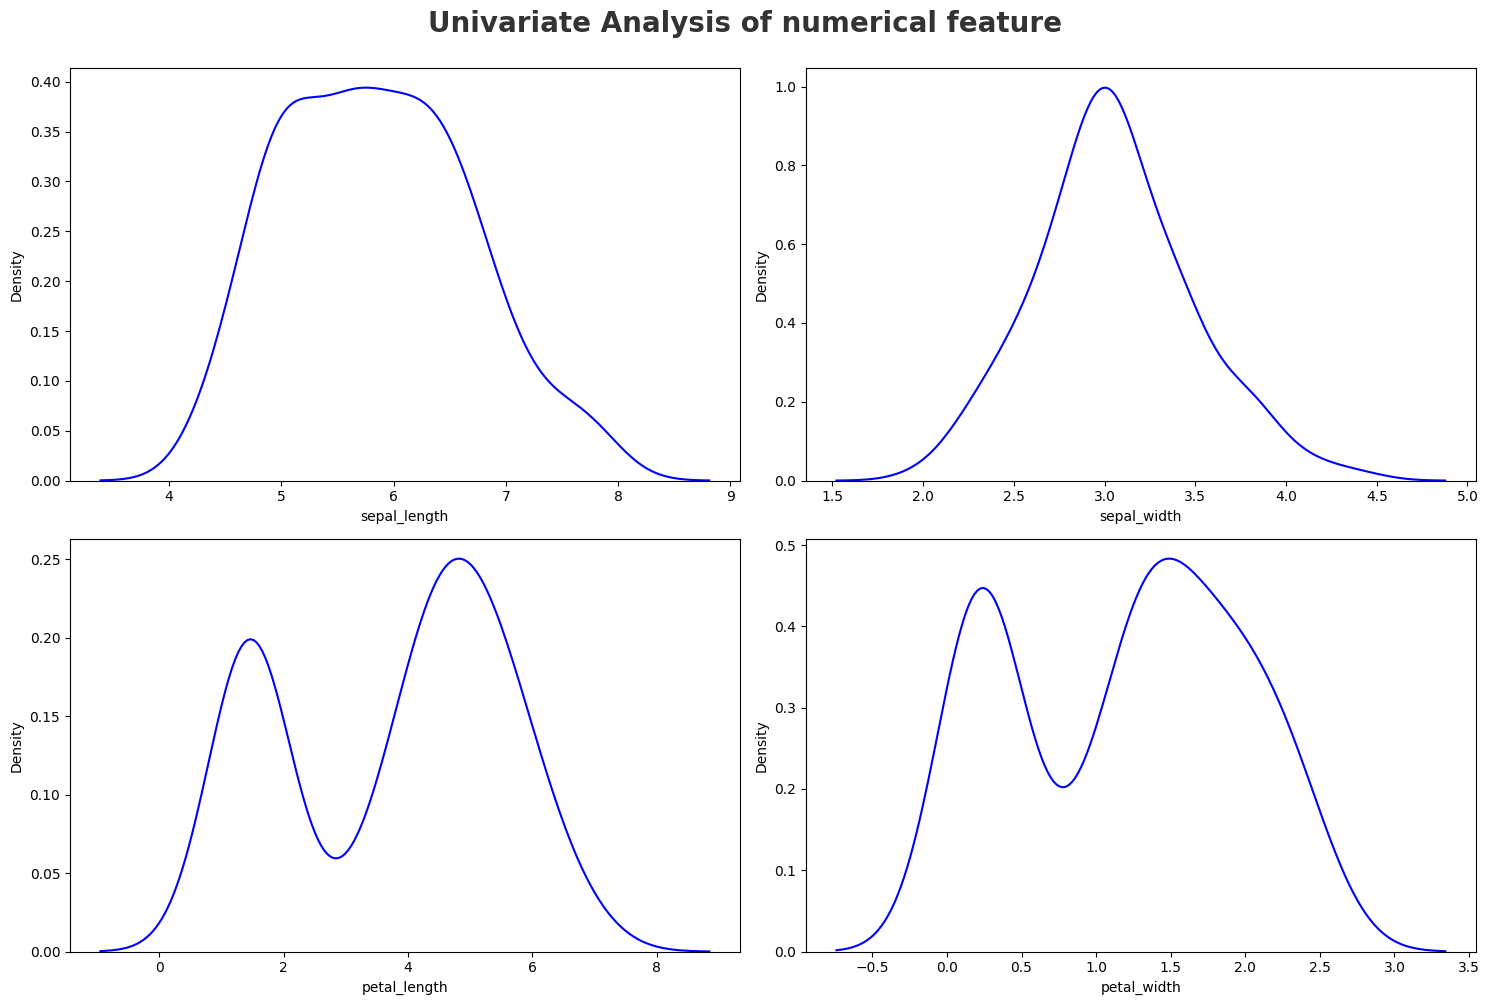

In [9]:
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of numerical feature',fontsize = 20,fontweight ='bold',alpha=0.8, y=1 )
for i in range(0,len(numerical_features)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[numerical_features[i]] ,color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
# save plot
# plt.savefig('./images/Univariate_Num.png')

**Insight**
- `sepal_length` :
- `sepal_width` :
- `petal_length` :
- `petal_width` :


### Categorical Features


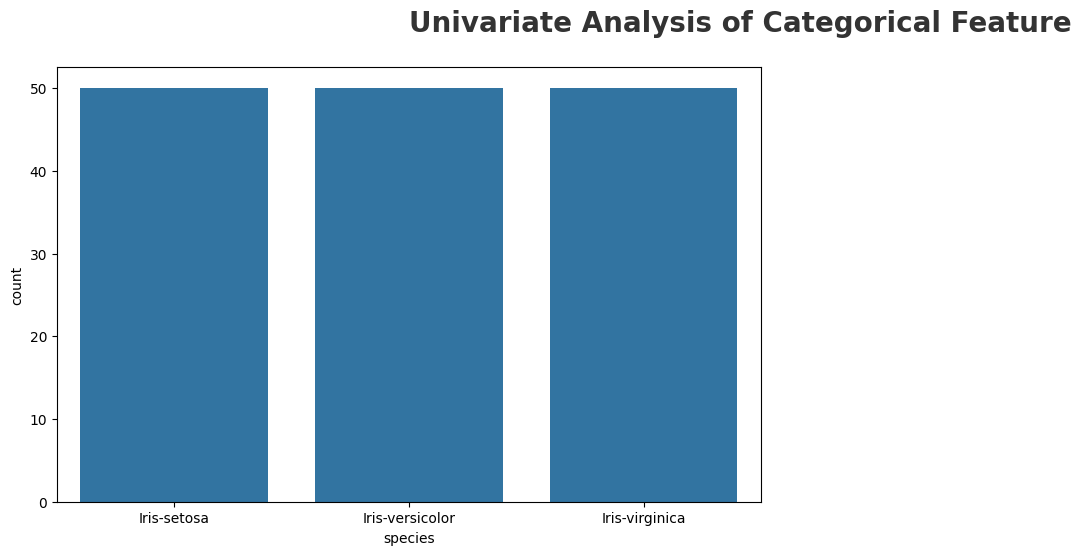

In [10]:
#remove if any irrelevant column
plt.figure(figsize=(15,10))
plt.suptitle('Univariate Analysis of Categorical Feature ',fontsize = 20,fontweight ='bold',alpha = 0.8,y=1.)
for i in range(0,len(categorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

**Insight**
- All three columns are balanced

### Multivariate Analysis

* Multivariate analysis is more than one variable analysis

In [11]:
threshold_value = 5 #as the total sample are too small (150)
discrete_features = [feature for feature in df.columns if len(df[feature].unique()) <= threshold_value]
continuous_features = [feature for feature in df.columns if len(df[feature].unique()) > threshold_value]

print('we have {} discrete features : {}'.format(len(discrete_features),discrete_features))
print('we have {} continuous features : {}'.format(len(continuous_features),continuous_features))


we have 1 discrete features : ['species']
we have 4 continuous features : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


### Check the multicolinearity in numerical features

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Insight**
- There is no colinarity between any variable

### Check the multicolinearity for categorical feature
* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e case_status**


Null Hypothesis ($ H_0 $): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($ H_1 $): The Feature and Target column are not independent (Correalted)

In [13]:
# from scipy.stats import chi2_contingency
# chi2_test = []
# for feature in categorical_features:
#     if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
#         chi2_test.append('Reject Null Hypothesis')
#     else:
#         chi2_test.append('Fail to Reject Null Hypothesis')
# result = pd.DataFrame(data=[categorical_features, chi2_test]).T
# result.columns = ['Column', 'Hypothesis Result']
# result

**Report**
* Here we have only one categorical feature ,so the above test is not required

### Checking null values

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

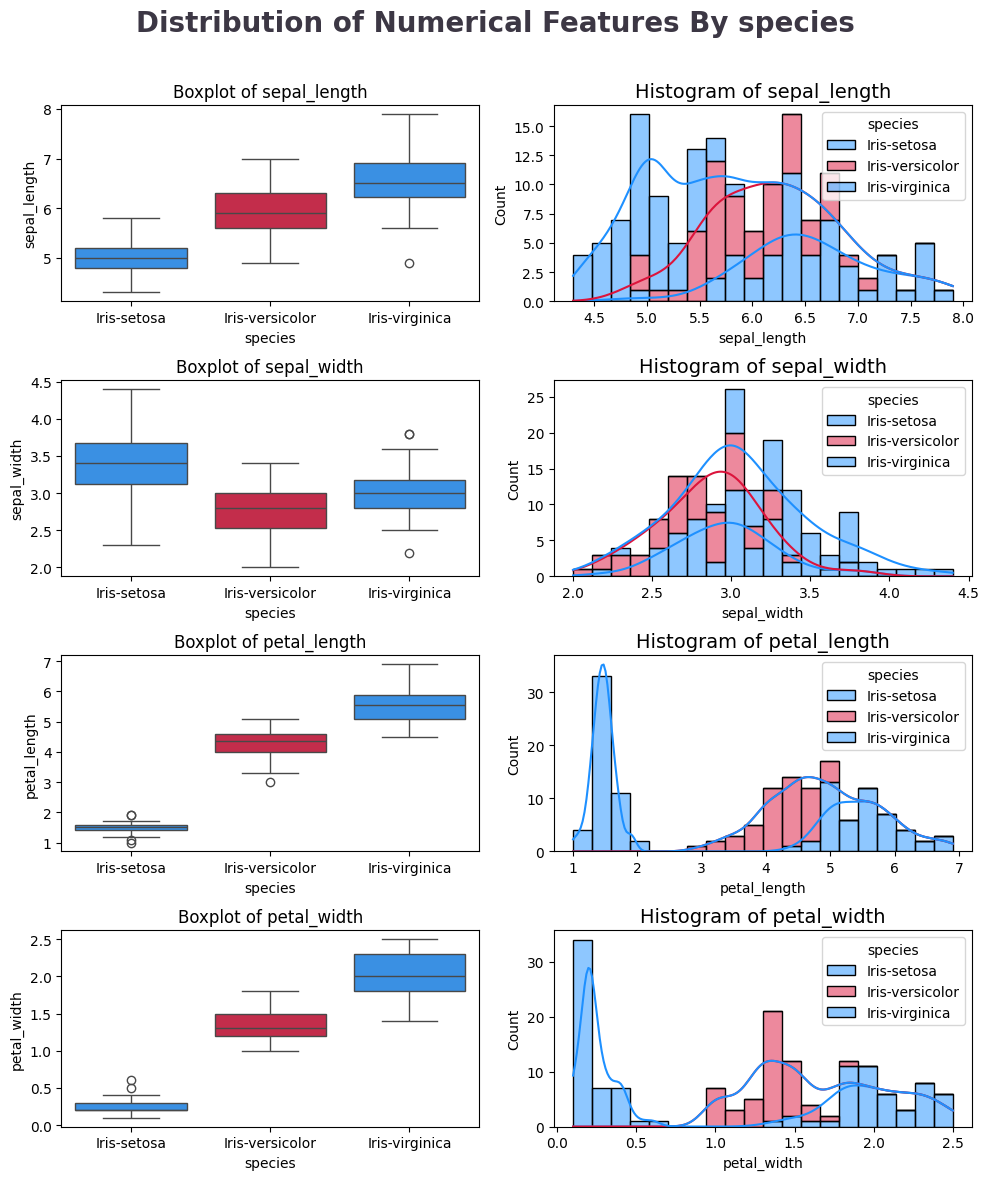

In [15]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By species', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='species', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='species', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

## Initial Analysis Report

* **Allmost no outliers present**
* **Numerical coding is required for species i.e. done in feature engineering**

## 4. Visualization

### 4.1 Visualization the Target Feature

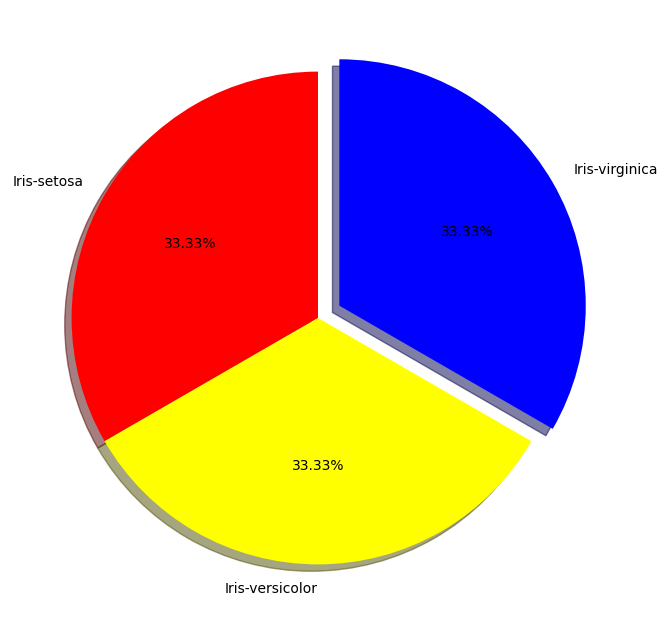

In [24]:
percentage = df.species.value_counts(normalize=True)*100
labels = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0,0, 0.1)
colors = ['red','yellow','blue']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

* From the chart it is seen that the target variable is balanced

### 4.2 Does sepal_length has any impact on species ?

In [25]:
df.groupby('sepal_length').species.value_counts()

sepal_length  species        
4.3           Iris-setosa        1
4.4           Iris-setosa        3
4.5           Iris-setosa        1
4.6           Iris-setosa        4
4.7           Iris-setosa        2
4.8           Iris-setosa        5
4.9           Iris-setosa        4
              Iris-virginica     1
              Iris-versicolor    1
5.0           Iris-setosa        8
              Iris-versicolor    2
5.1           Iris-setosa        8
              Iris-versicolor    1
5.2           Iris-setosa        3
              Iris-versicolor    1
5.3           Iris-setosa        1
5.4           Iris-setosa        5
              Iris-versicolor    1
5.5           Iris-versicolor    5
              Iris-setosa        2
5.6           Iris-versicolor    5
              Iris-virginica     1
5.7           Iris-versicolor    5
              Iris-setosa        2
              Iris-virginica     1
5.8           Iris-versicolor    3
              Iris-virginica     3
              Iris-setosa

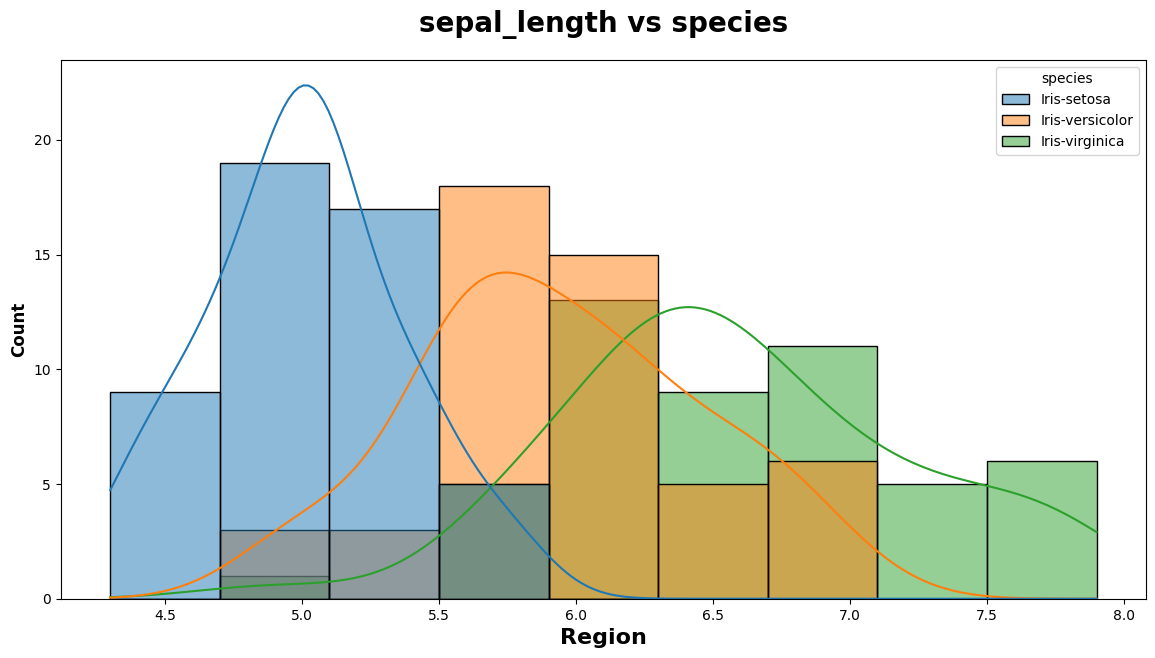

In [26]:
plt.subplots(figsize=(14,7))
sns.histplot(x="sepal_length",hue="species", data=df, kde=True)
plt.title("sepal_length vs species", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

### 4.3 Does sepal_width has any impact on species ?

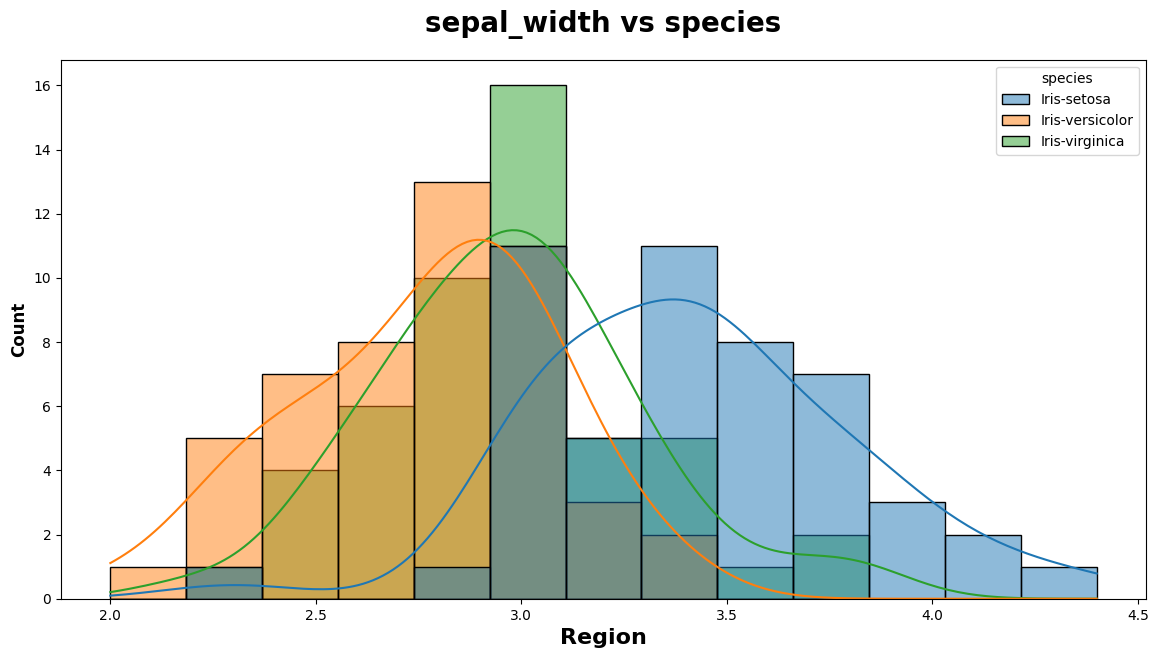

In [27]:
plt.subplots(figsize=(14,7))
sns.histplot(x="sepal_width",hue="species", data=df, kde=True)
plt.title("sepal_width vs species", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

### 4.4 Does petal_length has any impact on species ?

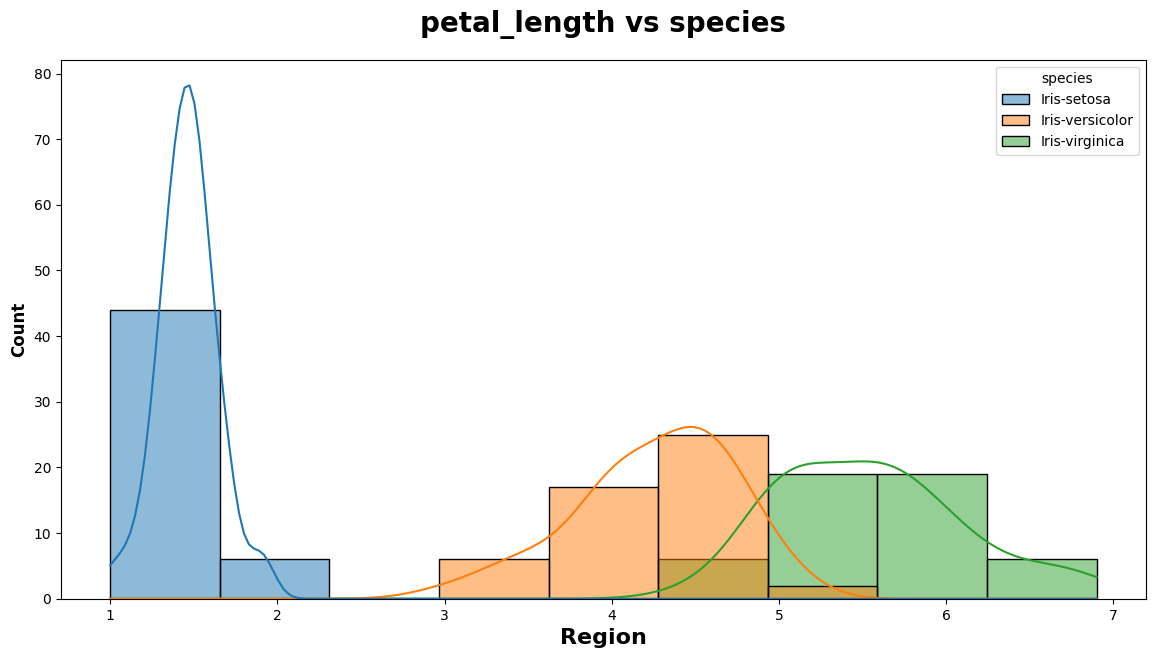

In [28]:
plt.subplots(figsize=(14,7))
sns.histplot(x="petal_length",hue="species", data=df, kde=True)
plt.title("petal_length vs species", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

### 4.5 Does petal_width has any impact on species ?

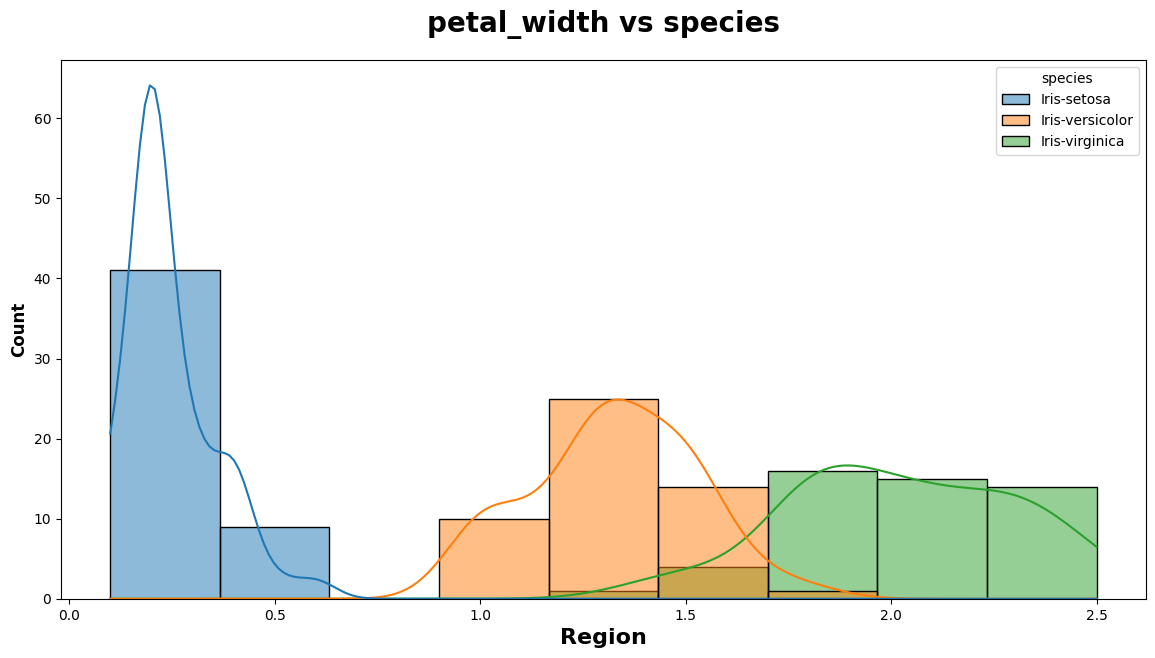

In [29]:
plt.subplots(figsize=(14,7))
sns.histplot(x="petal_width",hue="species", data=df, kde=True)
plt.title("petal_width vs species", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

### Final Report 
* `data` is balnced and unbiased .

In [30]:
########################-------------Feature Engineering and Model Training in Next ipynb-----------###########################